In [1]:
projPath = '/home/anna/Documents/Publicacions/articles/heroina/SimuladorAIS/project/'

In [2]:
projPath_save = '/home/alvaro/notebook/jupyterenv/bin/TFM/22-23_Maniobres-20221022T161922Z-001/22-23_Maniobres/data/interim/'

In [3]:
projPath_save_test = '/home/alvaro/notebook/jupyterenv/bin/TFM/CODIGO/test_tfm_code_test/'

In [4]:
rawAISpath = '/home/alvaro/notebook/jupyterenv/bin/TFM/22-23_Maniobres-20221022T161922Z-001/22-23_Maniobres/data/raw/'

In [5]:
month = '202206'

In [6]:
darsena = '_DM'

# Global variables

In [7]:
buffer_basin = 20 #m
buffer_dock = 30 #m

min_points = 10

# Libraries

In [8]:
import numpy as np
import pandas as pd

import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
%matplotlib inline

# Load data

## Dynamic 

In [10]:
dfA = pd.read_csv(rawAISpath + month + '/filtered_ClassA.csv')
dfA.drop(columns = 'second_sent', inplace = True)
len(dfA)

11527296

In [11]:
dfA.head()

,date,mmsi,status,turn,speed,lon,lat,course,heading
0,20220601000000,255801940,0,0.0,138.0,2.07723,41.18420,224.8,223.0
1,20220601000000,224569880,0,NaN,0.0,2.15260,41.34609,224.8,NaN
2,20220601000000,224138680,15,NaN,6.0,2.25217,41.36663,341.3,NaN
3,20220601000000,224296000,5,-6.0,0.0,2.15311,41.34397,18.7,185.0
4,20220601000001,247383500,0,0.0,176.0,2.31002,41.31993,235.4,234.0


Remove rows with empty mmsi

In [11]:
dfA = dfA.loc[~dfA.mmsi.isnull()].copy()
len(dfA)

11527296

Arrange date time

In [12]:
dfA.rename(columns={'date':'time_stamp'}, inplace = True)

In [13]:
dfA['time_stamp'] = pd.to_datetime(dfA['time_stamp'], format = '%Y%m%d%H%M%S')

In [14]:
dfA.head()

,time_stamp,mmsi,status,turn,speed,lon,lat,course,heading
0,2022-06-01 00:00:00,255801940,0,0.0,138.0,2.07723,41.18420,224.8,223.0
1,2022-06-01 00:00:00,224569880,0,NaN,0.0,2.15260,41.34609,224.8,NaN
2,2022-06-01 00:00:00,224138680,15,NaN,6.0,2.25217,41.36663,341.3,NaN
3,2022-06-01 00:00:00,224296000,5,-6.0,0.0,2.15311,41.34397,18.7,185.0
4,2022-06-01 00:00:01,247383500,0,0.0,176.0,2.31002,41.31993,235.4,234.0


## Static 

In [12]:
dfAs = pd.read_csv(rawAISpath + month + '/static_ClassA.csv', parse_dates = ['day'])

In [13]:
dfAs.head()

,mmsi,shipname,shiptype,draught,day,to_bow,to_stern,to_starboard,to_port,imo
0,249567000,MRC EMIRHAN,82,6.4,2022-06-01,88.0,19.0,2.0,14.0,9444936
1,249567000,MRC EMIRHAN,80,5.0,2022-06-02,88.0,19.0,2.0,14.0,9444936
2,636016492,MSC SAO PAULO,71,9.2,2022-06-01,247.0,47.0,20.0,12.0,9147071
3,636016492,MSC SAO PAULO,74,10.3,2022-06-15,247.0,47.0,20.0,12.0,9147071
4,636016492,MSC SAO PAULO,74,9.2,2022-06-16,247.0,47.0,20.0,12.0,9147071


In [16]:
dfAs['day'] = dfAs['day'].dt.date

## Map 

In [17]:
moll_map = gpd.read_file('/home/alvaro/notebook/jupyterenv/bin/TFM/22-23_Maniobres-20221022T161922Z-001/22-23_Maniobres/data/maps/MollsDarsenaMorrot_noTalo.shp')
dm_map = gpd.read_file('/home/alvaro/notebook/jupyterenv/bin/TFM/22-23_Maniobres-20221022T161922Z-001/22-23_Maniobres/data/maps/DarsenaMorrot.shp')

<AxesSubplot:>

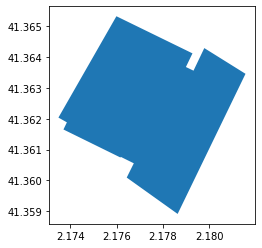

In [18]:
dm_map.plot()

In [19]:
dm_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
dm_buffer = gpd.GeoDataFrame(geometry = dm_map.to_crs(32631).buffer(buffer_basin).to_crs(4326))
dm_buffer.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
moll_buffer = gpd.GeoDataFrame(geometry = moll_map.to_crs(32631).buffer(buffer_dock, cap_style = 2,join_style = 2).to_crs(4326))

<AxesSubplot:>

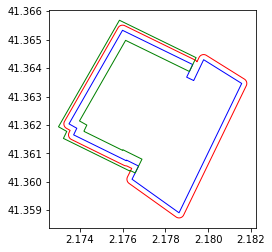

In [22]:
fig, ax = plt.subplots()
dm_map.plot(ax = ax, fc = 'none', ec = 'blue')
dm_buffer.plot(ax = ax, fc = 'none', ec = 'red')
moll_buffer.plot(ax = ax, fc = 'none', ec = 'green')


# Initial spatial filter

In [23]:
lonmin = dm_buffer.geometry.bounds.minx[0]
lonmax = dm_buffer.geometry.bounds.maxx[0]
latmin = dm_buffer.geometry.bounds.miny[0]
latmax = dm_buffer.geometry.bounds.maxy[0]

**Dàrsena del morrot**
lonmin = 2.173055
lonmax = 2.18157
latmin = 41.35888
latmax = 41.365536

**Dàrsena de l'energia**
lonmin = 2.14
lonmax = 2.17
latmin = 41.3275
latmax = 41.35

**Port de Barcelona**
lonmin = 2.118925
lonmax = 2.199688
latmin = 41.288579
latmax = 41.381801

In [24]:
dfA = dfA.loc[(dfA.lon>=lonmin)&(dfA.lon<=lonmax)&(dfA.lat>=latmin)&(dfA.lat<=latmax)].copy()
len(dfA)

328355

In [25]:
dfA.reset_index(inplace = True, drop = True)

# GeoDataFrame

In [26]:
gdfA = gpd.GeoDataFrame(dfA[['mmsi','lon','lat']], geometry = gpd.points_from_xy(dfA.lon, dfA.lat),crs = dm_map.crs)

In [27]:
gdfA.head()

,mmsi,lon,lat,geometry
0,224878000,2.17964,41.36394,POINT (2.17964 41.36394)
1,224878000,2.17964,41.36394,POINT (2.17964 41.36394)
2,224878000,2.17964,41.36393,POINT (2.17964 41.36393)
3,224878000,2.17964,41.36393,POINT (2.17964 41.36393)
4,224878000,2.17964,41.36393,POINT (2.17964 41.36393)


# Spatial filter

## MMSI's docking at Dàrsena 

In [28]:
inner = gpd.sjoin(gdfA, moll_buffer, how = 'inner')

In [29]:
gdfA = gdfA.loc[gdfA.mmsi.isin(inner.mmsi)]
len(gdfA)

220498

## Points within Dàrsena 

In [30]:
inner = gpd.sjoin(gdfA, dm_buffer, how = 'inner', op = 'within')

In [31]:
len(inner)

210929

In [32]:
df = dfA.loc[dfA.index.isin(inner.index)].copy()
len(df)

210929

In [33]:
df.reset_index(inplace = True, drop = True)

In [34]:
df['day'] = df.time_stamp.dt.date

## Apply to static messages

In [35]:
len(dfAs)

6556

In [36]:
dfAs = dfAs.loc[dfAs.mmsi.isin(df.mmsi.unique())].copy().reset_index()
len(dfAs)

391

# Filter mmsi with less than 10 points 

In [37]:
bins = [0,10,50,100,500,1000,2000,3000,4000,5000,10000,50000]

(0.0, 11000.0)

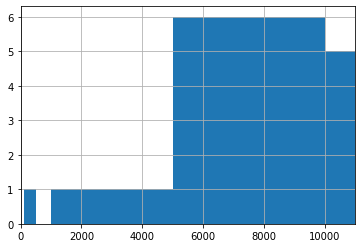

In [38]:
fig,ax = plt.subplots()
df.groupby(by = 'mmsi').size().hist(bins = bins)
ax.set_xlim([0,11000])


In [39]:
aux = df.groupby(by = 'mmsi').size().to_frame('points').reset_index()
aux.drop(columns = 'mmsi').groupby(pd.cut(aux.points, bins)).count()

,points
points,
"(0, 10]",0
"(10, 50]",0
"(50, 100]",0
"(100, 500]",1
"(500, 1000]",0
"(1000, 2000]",1
"(2000, 3000]",1
"(3000, 4000]",1
"(4000, 5000]",1


In [40]:
aux.loc[aux.points<=min_points]['mmsi'].tolist()

[]

In [41]:
df = df.loc[~df.mmsi.isin(aux.loc[aux.points<=min_points]['mmsi'].tolist())]
len(df)

210929

# df_aux creation and Save

In [42]:
df_aux1 = pd.merge(df, dfAs, on=['mmsi','day'], how='inner')
len(df)

210929

In [45]:
df_aux1.to_csv(projPath_save_test + month + darsena +'_df_aux1_test.csv', index = False, columns = ['time_stamp','mmsi','status','turn','speed','lon','lat','course','heading', 'day', 'index','shipname','shiptype','draught','to_bow','to_stern', 'to_starboard','to_port', 'imo'])

# Save data

In [46]:
df.head()

,time_stamp,mmsi,status,turn,speed,lon,lat,course,heading,day
0,2022-06-01 00:00:06,224878000,0,NaN,0.0,2.17964,41.36394,238.2,NaN,2022-06-01
1,2022-06-01 00:00:16,224878000,0,NaN,0.0,2.17964,41.36394,238.2,NaN,2022-06-01
2,2022-06-01 00:00:27,224878000,0,NaN,0.0,2.17964,41.36393,238.2,NaN,2022-06-01
3,2022-06-01 00:00:37,224878000,0,NaN,0.0,2.17964,41.36393,238.2,NaN,2022-06-01
4,2022-06-01 00:00:47,224878000,0,NaN,0.0,2.17964,41.36393,238.2,NaN,2022-06-01


In [61]:
df.to_csv(projPath_save + month + darsena +'.csv', index = False, columns = ['time_stamp','mmsi','status','turn','speed','lon','lat','course','heading'])

# Plot 

## Join static messages 

In [50]:
df_aux = pd.merge(df, dfAs, on=['mmsi','day'], how='inner')
len(df)

210929

In [51]:
df_aux.head()

,time_stamp,mmsi,status,turn,speed,lon,lat,course,heading,day,index,shipname,shiptype,draught,to_bow,to_stern,to_starboard,to_port,imo
0,2022-06-01 00:00:06,224878000,0,NaN,0.0,2.17964,41.36394,238.2,NaN,2022-06-01,836,SPABUNKER 41,89,5.5,1.0,1.0,3.0,2.0,9127382
1,2022-06-01 00:00:16,224878000,0,NaN,0.0,2.17964,41.36394,238.2,NaN,2022-06-01,836,SPABUNKER 41,89,5.5,1.0,1.0,3.0,2.0,9127382
2,2022-06-01 00:00:27,224878000,0,NaN,0.0,2.17964,41.36393,238.2,NaN,2022-06-01,836,SPABUNKER 41,89,5.5,1.0,1.0,3.0,2.0,9127382
3,2022-06-01 00:00:37,224878000,0,NaN,0.0,2.17964,41.36393,238.2,NaN,2022-06-01,836,SPABUNKER 41,89,5.5,1.0,1.0,3.0,2.0,9127382
4,2022-06-01 00:00:47,224878000,0,NaN,0.0,2.17964,41.36393,238.2,NaN,2022-06-01,836,SPABUNKER 41,89,5.5,1.0,1.0,3.0,2.0,9127382


<AxesSubplot:xlabel='lon', ylabel='lat'>

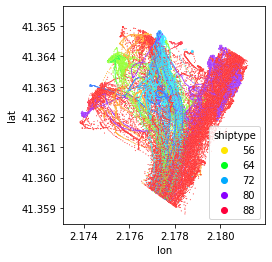

In [52]:
fig, ax = plt.subplots()
dm_map.plot(ax = ax, fc = 'none')
sns.scatterplot(data = df_aux, x = 'lon',y = 'lat', s = 1, hue = 'shiptype', palette = 'hsv')

# Statistics

## Points 

In [53]:
bins = [0,9,19,29,39,49,59,69,79,89,99]

In [54]:
df_aux['shiptype'].value_counts(bins = bins, sort = False)

(-0.001, 9.0]         0
(9.0, 19.0]           0
(19.0, 29.0]          0
(29.0, 39.0]          0
(39.0, 49.0]          0
(49.0, 59.0]      47017
(59.0, 69.0]      25091
(69.0, 79.0]      31424
(79.0, 89.0]     107397
(89.0, 99.0]          0
Name: shiptype, dtype: int64

array([<AxesSubplot:title={'center':'shiptype'}>], dtype=object)

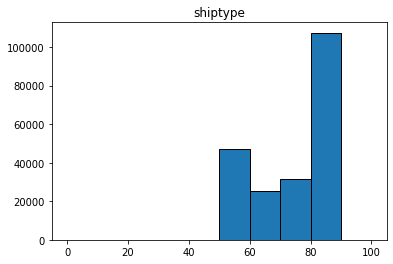

In [55]:
fig,ax = plt.subplots()
df_aux.hist(ax = ax, column = 'shiptype', bins = np.linspace(0,100,11), edgecolor = 'k', grid = False)

## MMSI's 

In [56]:
aux = df_aux.drop_duplicates(subset = 'mmsi')

In [57]:
aux[['mmsi','shiptype']].sort_values(by = 'shiptype')

,mmsi,shiptype
1217,225994881,50
1821,224551570,50
7680,225988173,50
9456,224304570,50
8541,225980532,50
15812,225987163,54
7905,247243600,60
40726,209115000,60
2691,247219400,60
24225,247383300,71


In [58]:
aux['shiptype'].value_counts(bins = bins, sort = False)

(-0.001, 9.0]    0
(9.0, 19.0]      0
(19.0, 29.0]     0
(29.0, 39.0]     0
(39.0, 49.0]     0
(49.0, 59.0]     6
(59.0, 69.0]     3
(69.0, 79.0]     5
(79.0, 89.0]     3
(89.0, 99.0]     0
Name: shiptype, dtype: int64

array([<AxesSubplot:title={'center':'shiptype'}>], dtype=object)

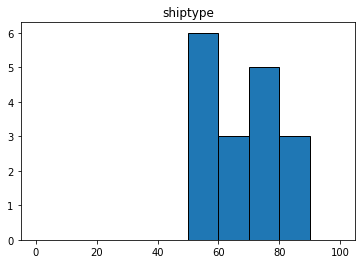

In [59]:
fig,ax = plt.subplots()
aux.hist(ax = ax, column = 'shiptype', bins = np.linspace(0,100,11), edgecolor = 'k', grid = False)

# COMPARE

In [44]:
df_auxt = pd.read_csv('/home/alvaro/notebook/jupyterenv/bin/TFM/22-23_Maniobres-20221022T161922Z-001/22-23_Maniobres/data/interim/202206_DM_df_aux.csv')

In [45]:
df_aux1.shape

(210929, 19)

In [46]:
df_auxt.shape

(210929, 19)

In [47]:
df_aux1.equals(df_auxt)

False

In [48]:
df_auxt.equals(df_aux1)

False

In [49]:
df_aux1.compare(df_auxt)

time_stamp                           lon                lat  \
                      self                other     self    other      self   
0      2022-06-01 00:00:06  2022-06-01 00:00:06      NaN      NaN       NaN   
1      2022-06-01 00:00:16  2022-06-01 00:00:16      NaN      NaN       NaN   
2      2022-06-01 00:00:27  2022-06-01 00:00:27      NaN      NaN  41.36393   
3      2022-06-01 00:00:37  2022-06-01 00:00:37      NaN      NaN  41.36393   
4      2022-06-01 00:00:47  2022-06-01 00:00:47      NaN      NaN  41.36393   
...                    ...                  ...      ...      ...       ...   
210924 2022-06-30 21:44:27  2022-06-30 21:44:27      NaN      NaN  41.36021   
210925 2022-06-30 21:44:35  2022-06-30 21:44:35      NaN      NaN       NaN   
210926 2022-06-30 21:44:45  2022-06-30 21:44:45  2.17763  2.17763       NaN   
210927 2022-06-30 21:44:57  2022-06-30 21:44:57      NaN      NaN       NaN   
210928 2022-06-30 21:45:06  2022-06-30 21:45:06      NaN      NaN       NaN   

                         day              
           other        self       other  
0            NaN  2022-06-01  2022-06-01  
1            NaN  2022-06-01  2022-06-01  
2       41.36393  2022-06-01  2022-06-01  
3       41.36393  2022-06-01  2022-06-01  
4       41.36393  2022-06-01  2022-06-01  
...          ...         ...         ...  
210924  41.36021  2022-06-30  2022-06-30  
210925       NaN  2022-06-30  2022-06-30  
210926       NaN  2022-06-30  2022-06-30  
210927       NaN  2022-06-30  2022-06-30  
210928       NaN  2022-06-30  2022-06-30  

[210929 rows x 8 columns]

In [55]:
(df_aux1['time_stamp'].dtypes, df_auxt['time_stamp'].dtypes)

(dtype('<M8[ns]'), dtype('O'))

In [56]:
(df_aux1['lon'].dtypes, df_auxt['lat'].dtypes)

(dtype('float64'), dtype('float64'))

In [57]:
(df_aux1['lat'].dtypes, df_auxt['lat'].dtypes)

(dtype('float64'), dtype('float64'))

In [58]:
(df_aux1['day'].dtypes, df_auxt['day'].dtypes)

(dtype('O'), dtype('O'))